In [4]:
%matplotlib inline
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
import statistics

from ipywidgets import interact, widgets

import skimage
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from scipy.ndimage import median_filter
from matplotlib.patches import Rectangle
from tqdm import tqdm

## Preparing the Images

In [7]:
#Scaling down Images if needed
MAX_SIZE = (500,500)
image = Image.open('train_images/000a8f2d5c316a.jpg')
image.thumbnail(MAX_SIZE, Image.ANTIALIAS)
image = ImageOps.pad(image, MAX_SIZE, color='black')


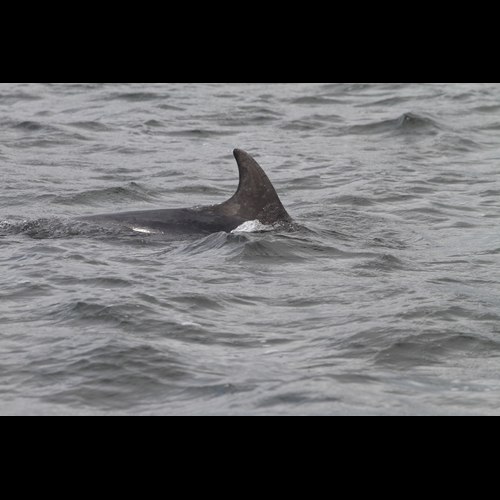

In [8]:
display(image)

In [27]:
#isolating color channels
red,green,blue = image.split()
#getting pixel data for channels
red_val = list(red.getdata())
green_val = list(green.getdata())
blue_val = list(blue.getdata())

In [28]:
#combine top and bottom row
red_filter_pixels = red_val[:image.width] + red_val[-image.width:]
green_filter_pixels = green_val[:image.width] + green_val[-image.width:]
blue_filter_pixels = blue_val[:image.width] + blue_val[-image.width:]

In [29]:
#calculate mode for the filters
red_mode = statistics.mode(red_filter_pixels)
green_mode = statistics.mode(green_filter_pixels)
blue_mode = statistics.mode(blue_filter_pixels)


#calculate mode of red channel --> to determine water | DEFAULT VAL
red_mode_range = 0.0
green_mode_range = 0
blue_mode_range = 0.0

#getting range for filter
@interact(r=(0.0,1.0,0.01),g=(0.0,1.0,0.01),b=(0.0,1.0,0.01))
def adj_range(r=red_mode_range,g=green_mode_range,b=blue_mode_range):
    red_range = (int(red_mode * (1-r)), int(red_mode * (1+r)))
    green_range = (int(green_mode * (1-g)), int(green_mode * (1+g)))
    blue_range = (int(blue_mode * (1-b)), int(blue_mode * (1+b)))
    
    
    #blacken out pixels if they are in red range determined to be water
    pixels = image.load()
    for i in range(image.width):
        for j in range(image.height):
            if pixels[i,j][0] in range(red_range[0],red_range[1]) or \
               pixels[i,j][1] in range(green_range[0],green_range[1]) or \
               pixels[i,j][2] in range(blue_range[0],blue_range[1]):
                pixels[i,j] = (255,255,255) #replaces filtered pixels with white
    display(image)


interactive(children=(FloatSlider(value=0.0, description='r', max=1.0, step=0.01), FloatSlider(value=0.0, desc…